In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [47]:
import json
import matplotlib.pyplot as plt
import numpy as np
import statistics

%matplotlib inline

import mpld3
mpld3.enable_notebook()

file_name = 'outputs/loss_10-21-2019-06:07PM'
with open(file_name) as f:
    all_results = json.load(f)
    # print(result)

LOG_EVERY = 10
VALID_ITER = 2000

# The data of 4 epoches
train_ppls = all_results['train_ppls']
valid_ppls = all_results['valid_ppls']
# print(len(train_ppls))
train_data_iters = np.arange(1, len(train_ppls) + 1) * LOG_EVERY
valid_data_iters = np.arange(1, len(valid_ppls) + 1) * VALID_ITER

'''
The valid data is 200 times of the train data. Maybe we can simplify the train data a bit 
to see the trend more precisely
'''
# Get train ppl medians
train_ppl_modes = []
for valid_idx in range(1, len(valid_ppls) + 1):
    train_idx = int(valid_idx * VALID_ITER / LOG_EVERY)
    partial_train_data = train_ppls[(train_idx - 100): (train_idx + 100)]
    train_data_mode_around_idx = statistics.median(partial_train_data)  # Get median
    train_ppl_modes.append(train_data_mode_around_idx)    
    
def draw_graph(start_iter):
    # Cut it by some index, or the too large data would make the graph a mess
    # CUT_ITER = 10000
    train_first_idx = np.where(train_data_iters >= start_iter)[0][0]
    valid_first_idx = np.where(valid_data_iters >= start_iter)[0][0]

    plt.title('Train and valid ppls')
    plt.plot(train_data_iters[train_first_idx:], train_ppls[train_first_idx:], '-o', label='train_ppls')
    plt.plot(valid_data_iters[valid_first_idx:], valid_ppls[valid_first_idx:], '-o', label='valid_ppls')
    plt.plot(valid_data_iters[valid_first_idx:], train_ppl_modes[valid_first_idx:], '-o', label='train_medians')
    
    # print(len(valid_ppls))
    plt.xlabel('iterations')
    plt.legend(loc='lower left')
    plt.gcf().set_size_inches(12, 9)
    plt.show()

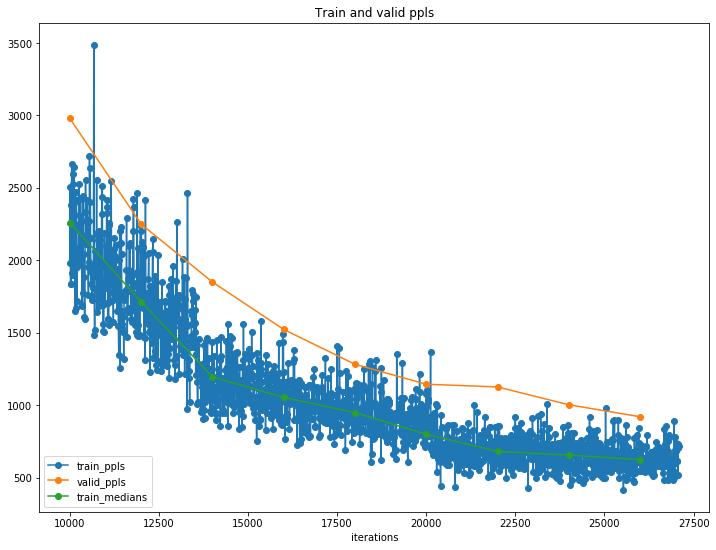

In [48]:
draw_graph(10000)